#**Overview:**
This notebook is used to open the images located in the password protected drive folder. They are then rescaled to two different sizes ( 224x224 and 384x384) and saved to a new file. Some exploration of the image pixel data is done, and the rgb channels of the images. The quality degradation of each scaling factor is also showcased.

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load dataframe
df = pd.read_csv('/content/drive/My Drive/Dissertation/Images/pneumonia_1519_PAAP.csv')
df.head()

,dicom_id,subject_id_x,study_id,ViewPosition,img_path,Pneumonia
0,043f2b1c-1b8b0a20-c9e5ec5d-02ac7d4a-35000b4c,15000170,56450978,PA,files/p15/p15000170/s56450978/043f2b1c-1b8b0a2...,0.0
1,39ee0432-150f8ee9-e65abf9a-15bc5beb-80fbf3f6,15000393,51634677,PA,files/p15/p15000393/s51634677/39ee0432-150f8ee...,0.0
2,80eeb158-92ef7719-b43ae606-fb2745cf-99680d44,15000393,51634677,PA,files/p15/p15000393/s51634677/80eeb158-92ef771...,0.0
3,8a2da5f5-09ea301d-768e059c-5f053a34-2d3b3057,15000393,52929930,PA,files/p15/p15000393/s52929930/8a2da5f5-09ea301...,1.0
4,b08efb71-38c915e9-3d9d7df0-d783d4d6-1317bf59,15000393,54674484,PA,files/p15/p15000393/s54674484/b08efb71-38c915e...,0.0


In [ ]:
#loading all the images from the img_path to a list
images = []
for img_path in tqdm(df['img_path'], desc="Loading images"):
    # Load the image using plt.imread
    img = plt.imread('/content/drive/My Drive/Dissertation/Images/' + img_path)
    # Append the image to the list
    images.append(img)

Loading images: 100%|██████████| 30684/30684 [4:40:19<00:00,  1.82it/s]


In [ ]:
img224 = []
img384 = []

for image in images:
  img224.append(cv2.resize(image, (224,224)))
  img384.append(cv2.resize(image, (384,384)))

In [ ]:
with open('/content/drive/My Drive/Dissertation/Images/image_list_1519_224.pkl', 'wb') as f:
    pickle.dump(img224, f)
with open('/content/drive/My Drive/Dissertation/Images/image_list_1519_384.pkl', 'wb') as f:
    pickle.dump(img384, f)

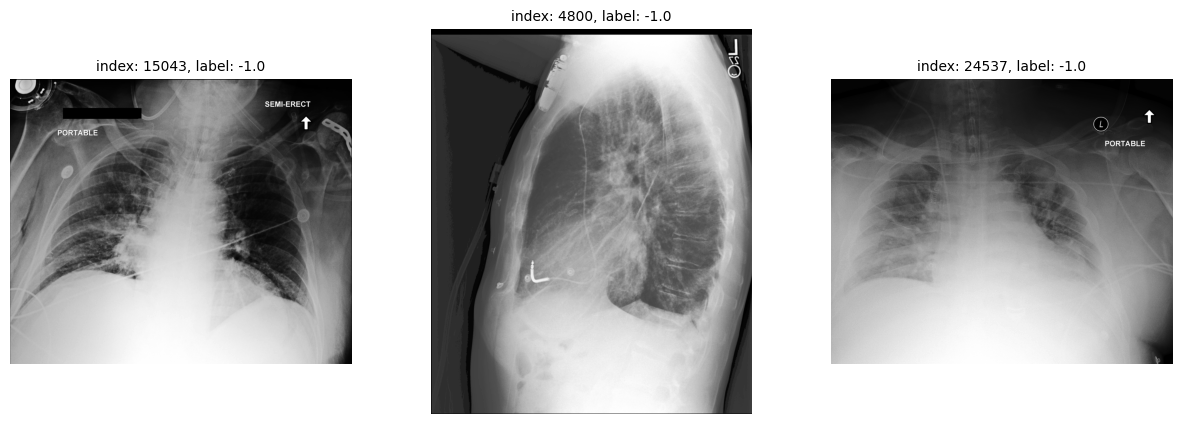

In [ ]:
# this code is used to visualise x-rays from each class, change value of pn_class accordingly
pn_class = 1
pn = df[df['pneumonia']== pn_class]
# take a random sample of 3 images
random_samples = pn.sample(n=3)

fig, axs = plt.subplots(1, 3, figsize=(15,5))

for i, ax in zip(random_samples.index.tolist(), axs):
  title = f"index: {i}, label: {df['pneumonia'].iloc[i]}"
  ax.imshow(images[i], cmap = 'gray')
  ax.axis('off')
  ax.set_title(title, fontsize=10)

plt.show()

pyplot reads the image as grayscale automatically

In [ ]:
images[3].shape

(3056, 2544)

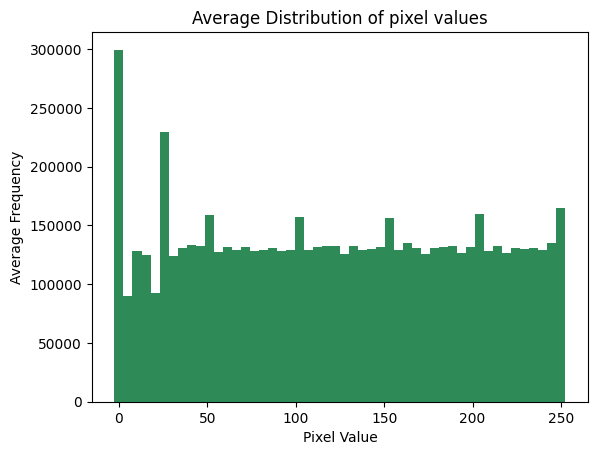

In [ ]:
# Sample 10 images
sample_images = images[:10]

# Flatten and concatenate the pixel values
all_pixels = np.concatenate([img.flatten() for img in sample_images])

# Calculate the average pixel value for each bin
hist, bins = np.histogram(all_pixels, bins=50)
average_values = hist / len(sample_images)
average_values[0] = average_values[0]*0.75
# Plot the histogram of average pixel values
plt.bar(bins[:-1], average_values, width=np.diff(bins), color='seagreen')
# plt.yscale('log')  # Change the y-axis scale to logarithmic
plt.title('Average Distribution of pixel values')
plt.xlabel('Pixel Value')
plt.ylabel('Average Frequency')
plt.show()

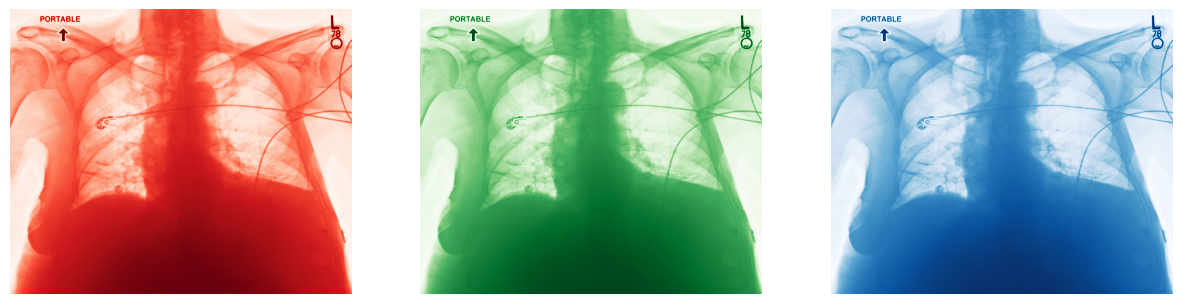

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(img_cv2[:,:,0], cmap = 'Reds')
axs[1].imshow(img_cv2[:,:,1], cmap = 'Greens')
axs[2].imshow(img_cv2[:,:,2], cmap = 'Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

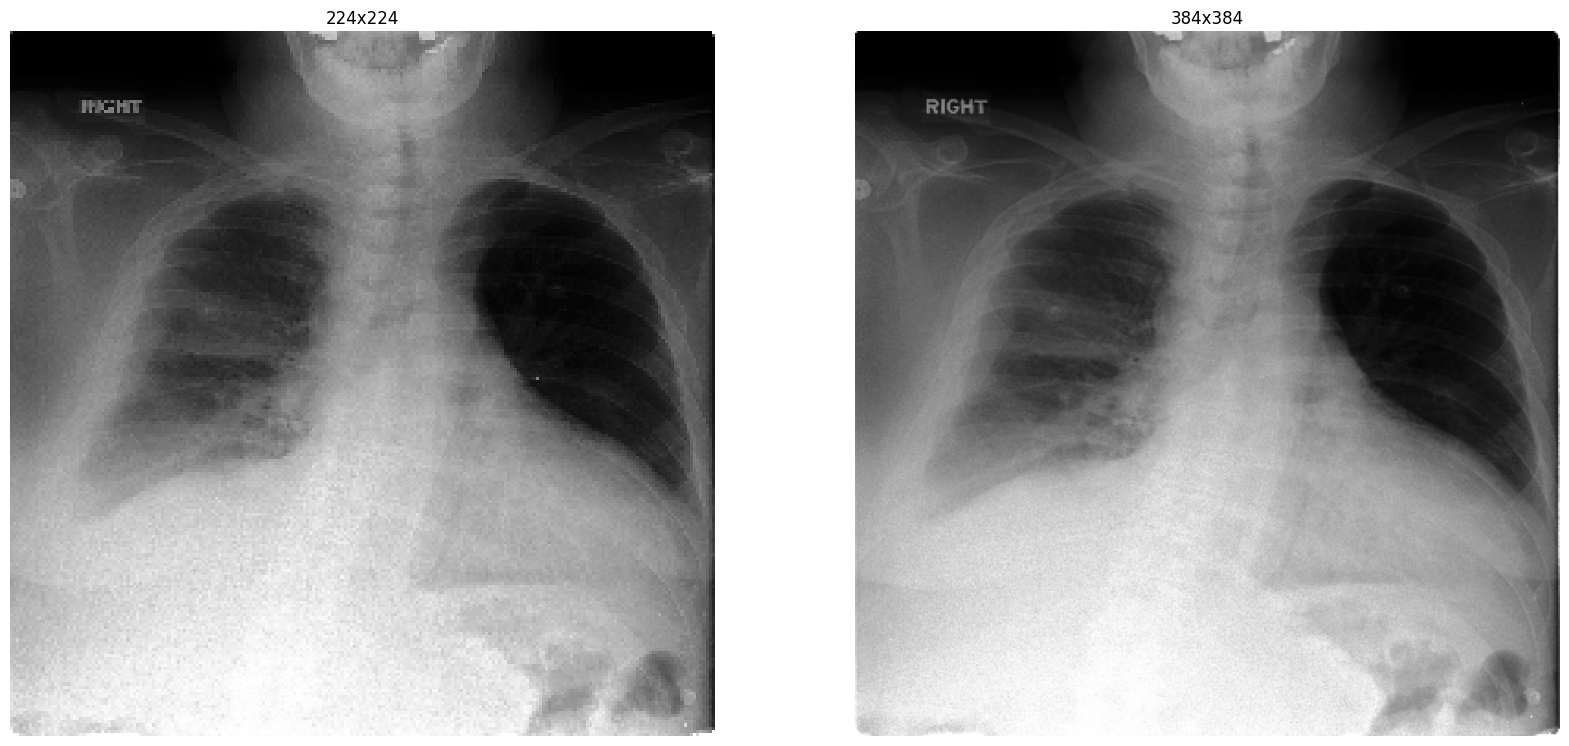

In [ ]:
# resize image

# img128 = cv2.resize(img1, (128,128))
# img258 = cv2.resize(img1, (258,258))
# img512 = cv2.resize(img1, (512,512))
ind = 15

fig, axs = plt.subplots(1,2, figsize=(20,10))
axs[0].imshow(img224[ind][:,:], cmap = 'gray')
axs[1].imshow(img384[ind][:,:], cmap = 'gray')
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('224x224')
axs[1].set_title('384x384')
plt.show()